In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#*********************************
# simulation parameters:
#*********************************
# initial latitude (degrees):
lat0 = 40
# initial velocity in x (m/s):
Vx0  = 30
# initial velocity in y (m/s):
Vy0  = 20
# simulation time (hours):
Time_period = 3
# time step (s):
dt = 1
# consider f costant?
f_constant = True
# Earth's angular speed of rotation:
omega = 2.*np.pi/(24.*60.*60.) 

In [3]:
#*********************************
# definition of functions:
#*********************************

def calc_acc(vx, vy, lat, w=omega):
    f=calc_f(lat, w)
    ax = f*vy
    ay = -f*vx
    return ax, ay

def calc_next_vel(vx, vy, ax, ay, delta_t=dt):
    vx_new = vx+ax*delta_t
    vy_new = vy+ay*delta_t
    return vx_new, vy_new

def calc_next_pos(x, y, vx, vy, delta_t=dt):
    x_new = x+vx*delta_t
    y_new = y+vy*delta_t
    return x_new, y_new

def calc_f(lat, w):
    return 2*w*np.sin(lat)

def calc_lat(lat0, y, y0=0, r=6.37e6):
    #lat0 must be in radians
    dlat = (y-y0)/r
    return lat0+dlat

In [4]:
#********************************************************************
# main code starts here:
#********************************************************************

# convert initial latitude to radians
lat0 = lat0*np.pi/180.

# define arrays and set initial values:
x   = np.array([0.])
y   = np.array([0.])
vx  = np.array([Vx0])
vy  = np.array([Vy0])
lat = np.array([lat0])

# compute initial acceleration:
ax0, ay0 = calc_acc(vx[-1], vy[-1], lat0) 
ax = np.array([ax0])
ay = np.array([ay0])

# compute new positions, velocities and accelerations throughout time:
t = 0
while t < Time_period*60*60.:
    vx_new, vy_new = calc_next_vel(vx[-1], vy[-1], ax[-1], ay[-1])
    x_new, y_new = calc_next_pos(x[-1], y[-1], vx[-1], vy[-1])
    x = np.append(x, x_new)
    y = np.append(y, y_new)
    vx = np.append(vx, vx_new)
    vy = np.append(vy, vy_new)
    lat = np.append(lat, calc_lat(lat0, y[-1], y[0]))
    if f_constant:
        ax_new, ay_new = calc_acc(vx[-1], vy[-1], lat0)
    else:
        ax_new, ay_new = calc_acc(vx[-1], vy[-1], lat[-1])
    ax = np.append(ax, ax_new)
    ay = np.append(ay, ay_new)
    t+= dt


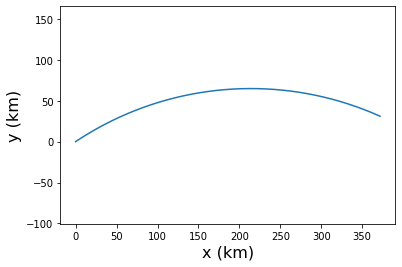

In [5]:
#*********************************
# create plot:
#*********************************
fig = plt.figure()
plt.plot(x*1e-3, y*1e-3)
plt.xlabel('x (km)', fontsize=16)
plt.ylabel('y (km)', fontsize=16)
lims=plt.axis('equal')
plt.savefig('plot.png')
plt.show()